# SINGLE VARIATE

In [136]:
# importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

In [137]:
#Here using actual sklearn model to compute slope, intercept, r2_score
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f"Actual slope of the model if {lr.coef_}")
print(f"Actual intercept of the model is {lr.intercept_}")
print(f"Actual r2_score of the model is {r2_score(y_test, pred)}")

Actual slope of the model if [46.747264]
Actual intercept of the model is 0.19844442845175614
Actual r2_score of the model is 0.8019015156159199


In [138]:
# Gradient descent to calculate the slope, intercept and r2_score
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1), y, test_size = 0.2, random_state = 42)


m = 0
b = 0
alpha = 0.001
epoch = 5000

loss = [] #this is for visualization purpose

for i in range(epoch):
    y_hat = (X_train*m)+b
    error = y_train - y_hat
    m_old = m
    dm = (-2/X_train.shape[0]) * np.dot(X_train, error)
    m = m - (alpha * dm)

    b_old = b
    db = (-2/X_train.shape[0]) * np.sum(error)
    b = b - (alpha * db)

    loss_1 = mean_squared_error(y_train, y_hat)
    loss.append(loss_1)                           #these two are for plotting loss

    if abs(m_old - m) <= 0.001 and abs(b_old - b) <= 0.001:
        print(f"Model Converged at {i} epoch")
        break
        
print(f"Gradient Descent slope is {m}")
print(f"Gradient Descent intercept is {b}")

y_pred = (X_test*m)+b
print(f"r2_score from Gradient descent is {r2_score(y_test, y_pred)}")

Model Converged at 2673 epoch
Gradient Descent slope is 46.10818181327722
Gradient Descent intercept is -0.06798536280966862
r2_score from Gradient descent is 0.7987672477347144


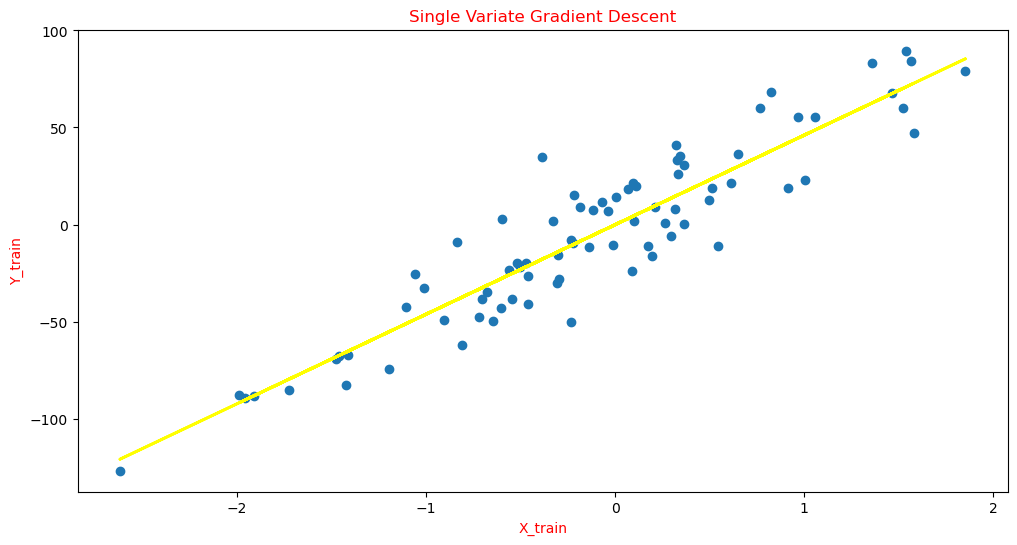

In [139]:
plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_hat, color='yellow', linewidth = 2)
plt.xlabel('X_train', color = 'red')
plt.ylabel('Y_train', color = 'red')
plt.title('Single Variate Gradient Descent', color = 'red')
plt.show()

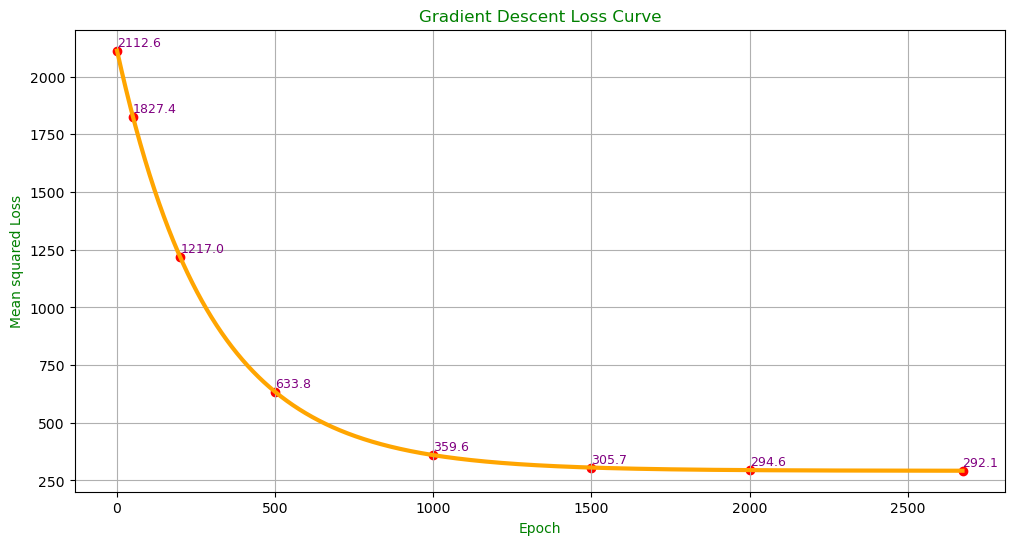

In [148]:
plt.figure(figsize = (12,6))
plt.plot(loss,color = 'orange', linewidth = 3)
plt.title('Gradient Descent Loss Curve', color = 'green')
plt.xlabel('Epoch', color = 'green')
plt.ylabel('Mean squared Loss', color = 'green')

epochs_to_mark = [0, 50, 200, 500, 1000, 1500, 2000, len(loss)-1]
for e in epochs_to_mark:
    plt.scatter(e, loss[e], color='red')
    plt.text(e, loss[e] + 20, f"{loss[e]:.1f}", fontsize=9, color='purple')
    
plt.grid(True)
plt.show()

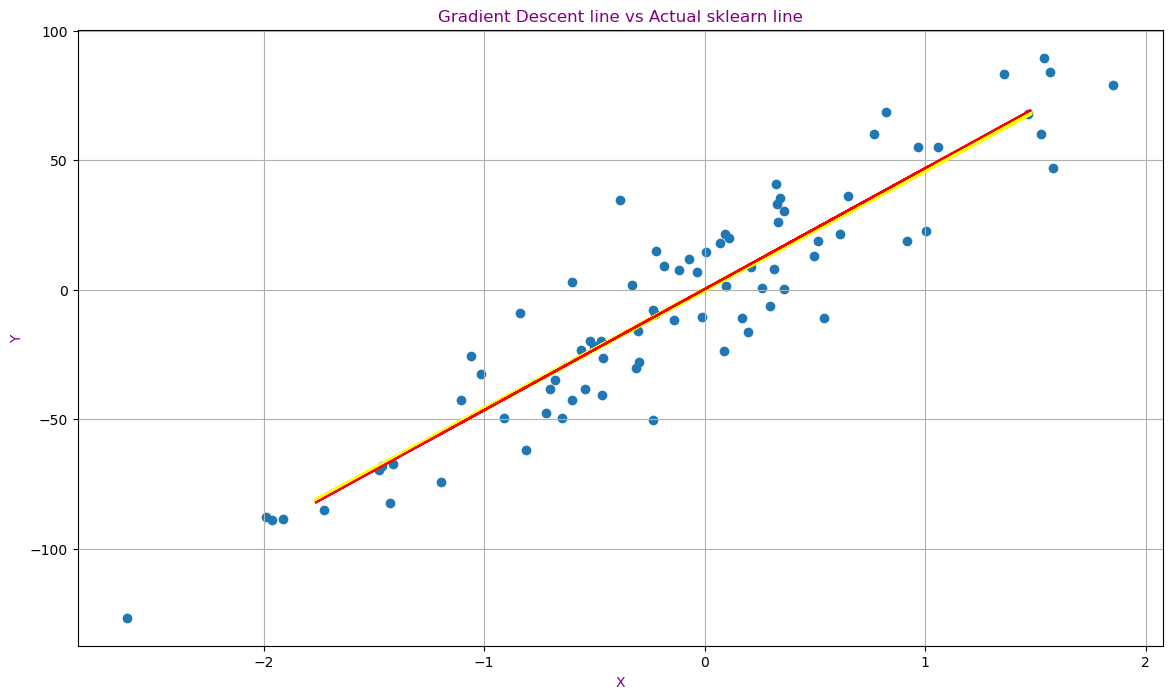

In [143]:
plt.figure(figsize = (14,8))

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'yellow', linewidth = 3)
plt.plot(X_test, pred, color = 'red')
plt.xlabel('X', color = 'purple')
plt.ylabel('Y', color = 'purple')
plt.title('Gradient Descent line vs Actual sklearn line', color = 'purple')

plt.grid(True)
plt.show()

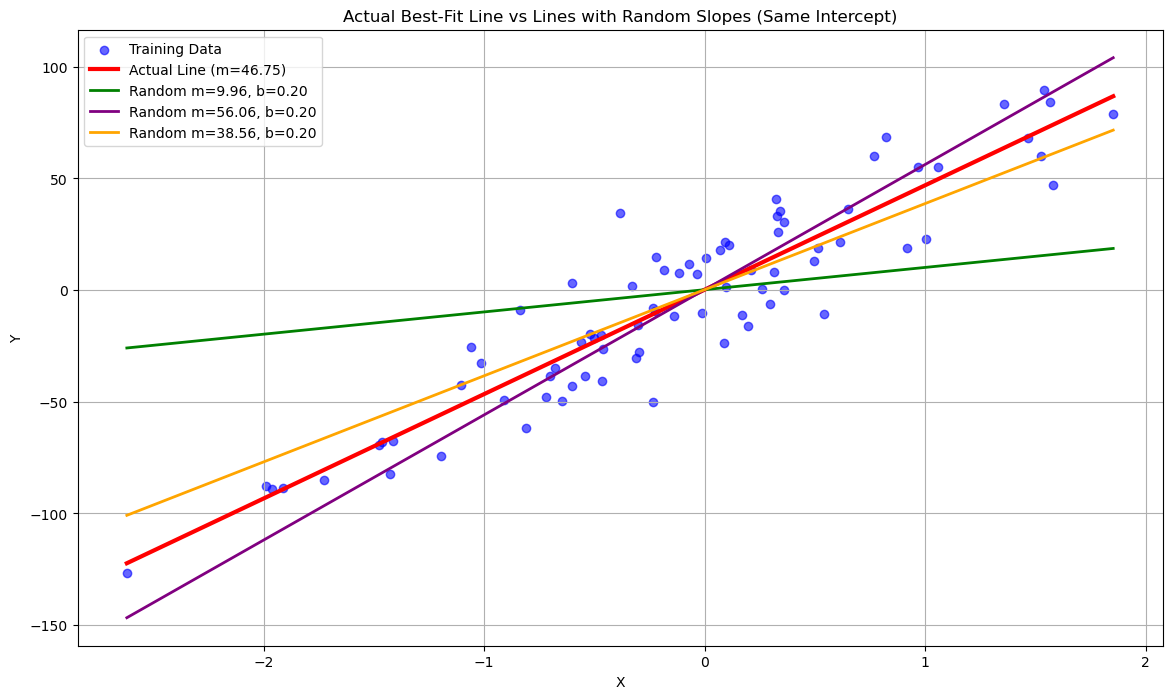

In [152]:
m_actual = lr.coef_[0]         
b_actual = lr.intercept_       

np.random.seed(42)
m_random = np.random.uniform(-20, 60, 3)

x_line = np.linspace(X_train.min(), X_train.max(), 200)

plt.figure(figsize=(14,8))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)

y_actual_line = m_actual * x_line + b_actual
plt.plot(x_line, y_actual_line, color='red', linewidth=3, label=f"Actual Line (m={m_actual:.2f})")

colors = ['green', 'purple', 'orange']
for i in range(3):
    y_rand = m_random[i] * x_line + b_actual
    plt.plot(x_line, y_rand, color=colors[i], linewidth=2,
             label=f"Random m={m_random[i]:.2f}, b={b_actual:.2f}")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Actual Best-Fit Line vs Lines with Random Slopes (Same Intercept)")
plt.legend()
plt.grid(True)
plt.show()

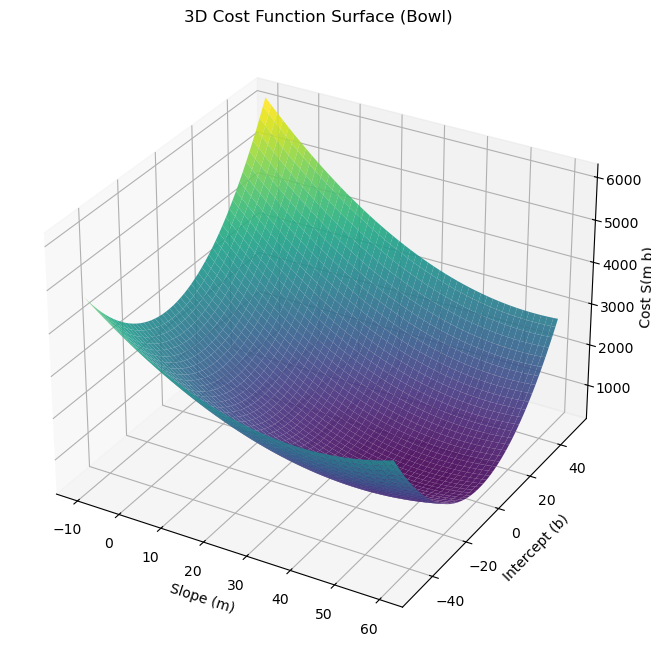

In [145]:
from mpl_toolkits.mplot3d import Axes3D

X = X_train
Y = y_train

m_values = np.linspace(-10, 60, 200)
b_values = np.linspace(-50, 50, 200)

M, B = np.meshgrid(m_values, b_values)

S = np.zeros_like(M)

for i in range(len(m_values)):
    for j in range(len(b_values)):
        y_pred = M[i,j] * X + B[i,j]
        S[i,j] = np.mean((Y - y_pred)**2)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, S, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost S(m,b)')
ax.set_title('3D Cost Function Surface (Bowl)')

plt.show()

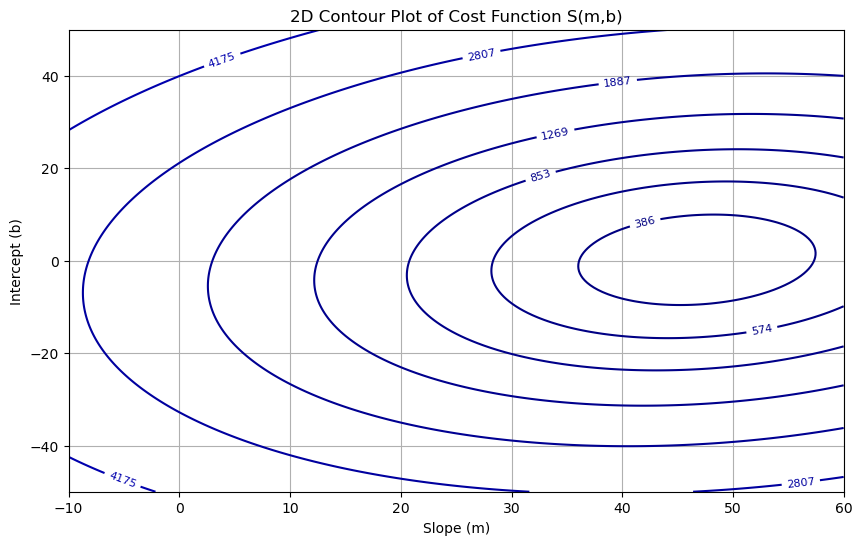

In [146]:
plt.figure(figsize=(10, 6))

cont_levels = np.logspace(0, 5, 30)

CS = plt.contour(M, B, S, levels=cont_levels, cmap='jet')
plt.clabel(CS, inline=True, fontsize=8)

plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')
plt.title('2D Contour Plot of Cost Function S(m,b)')

plt.grid(True)
plt.show()

# MULTI VARIATE

In [188]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [189]:
df = pd.read_csv(r"Dataset_link")
df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,4,2.50,1940,10500,1.0,4,1140,800,1976,1992,550000.0
1,4,2.50,2920,4000,1.5,5,1910,1010,1909,1988,1400000.0
2,4,1.75,1600,6380,1.0,3,1130,470,1959,1989,495000.0
3,3,2.50,2600,4750,1.0,4,1700,900,1951,1999,790000.0
4,4,2.50,2860,3345,2.0,3,2190,670,2004,2003,499950.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       811 non-null    int64  
 1   bathrooms      811 non-null    float64
 2   sqft_living    811 non-null    int64  
 3   sqft_lot       811 non-null    object 
 4   floors         811 non-null    float64
 5   condition      811 non-null    int64  
 6   sqft_above     811 non-null    int64  
 7   sqft_basement  811 non-null    int64  
 8   yr_built       811 non-null    int64  
 9   yr_renovated   811 non-null    int64  
 10  price          811 non-null    float64
dtypes: float64(3), int64(7), object(1)
memory usage: 69.8+ KB


In [191]:
df['sqft_lot'].unique()[:50]

array(['10500', '4000', '6380', '4750', '3345', '5000', '42884', 'a',
       '10000', '9933', '6010', '10202', '7712', '36704', '9000', '5700',
       '8426', '12750', '9240', '7519', '4240', '10200', '8640', '9211',
       '7740', '7475', '8103', '23400', '11600', '929', '7684', '10720',
       '6083', '6500', '6000', '3780', '7735', '10279', '8632', '5401',
       '6988', '13695', '16164', '13300', '4316', '5940', '5500', '6180',
       '4284', '10762'], dtype=object)

In [192]:
df["price"] = df["price"].astype(int)
df['sqft_lot'] = pd.to_numeric(df['sqft_lot'], errors='coerce')
df = df.dropna(subset=['sqft_lot']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       810 non-null    int64  
 1   bathrooms      810 non-null    float64
 2   sqft_living    810 non-null    int64  
 3   sqft_lot       810 non-null    float64
 4   floors         810 non-null    float64
 5   condition      810 non-null    int64  
 6   sqft_above     810 non-null    int64  
 7   sqft_basement  810 non-null    int64  
 8   yr_built       810 non-null    int64  
 9   yr_renovated   810 non-null    int64  
 10  price          810 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 69.7 KB


In [193]:
X = df.iloc[:,:10].to_numpy(dtype=float)
y = df.iloc[:,10].to_numpy(dtype=float)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
def multi_varient_gd(X, y, alpha = 0.001, n = 5000, tol = 0.000001):


    w = np.zeros(X.shape[1])
    b = 0.0

    losses = []

    for _ in range(n):
        y_pred = np.dot(X, w)+b
    
        error = y - y_pred

        loss = np.mean(error**2)
        losses.append(loss)
        
        dw = (-2/X.shape[0]) * np.dot(X.T, error)
        db = (-2/X.shape[0]) * np.sum(error)
    
        w_old = w.copy()
        b_old = b
    
        w = w - (alpha * dw)
        b = b - (alpha * db)
    
        if np.linalg.norm(w - w_old) <= tol and abs(b - b_old) <= tol:
            break
            
    return w,b, losses
    

In [196]:
w, b, losses = multi_varient_gd (X_train, y_train)
y_pred_gd = np.dot(X_test,w)+b
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_score_gd = r2_score(y_test, y_pred_gd)

print("Multi Variate Gradient Descent Mean Squared Error = ", mse_gd)
print()
print("Multi Variate Gradient Descent r2_Score = ", r2_score_gd)
print()
print("Multi Variate Gradient Descent slope = ", w)
print()
print("Multi Variate Gradient Descent intercept = ", b)

Multi Variate Gradient Descent Mean Squared Error =  693211097059.367

Multi Variate Gradient Descent r2_Score =  0.12647976732859867

Multi Variate Gradient Descent slope =  [ -80221.3198343    23954.98118035  176993.43867699  -38031.91980506
  -23614.88763132     755.06990631  206905.27397902   53469.71812549
 -119782.75648603  -11264.28540566]

Multi Variate Gradient Descent intercept =  619256.6866973883


In [197]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Actual sklearn model Mean Squared Error = ", mse_lr)
print()
print("Actual sklearn model r2_score = ", r2_lr)
print()
print("Actual sklearn model Slope = ", lr.coef_)
print()
print("Actual sklearn model Intercept = ", lr.intercept_)

Actual sklearn model Mean Squared Error =  693234762945.1154

Actual sklearn model r2_score =  0.1264499457776843

Actual sklearn model Slope =  [-7.96903117e+04  2.26820318e+04  1.79247526e+05 -3.85182471e+04
 -2.93220979e+04 -1.38607453e+02  2.12295210e+05  4.94355020e+04
 -1.20562997e+05 -1.31322010e+04]

Actual sklearn model Intercept =  619284.5220458553


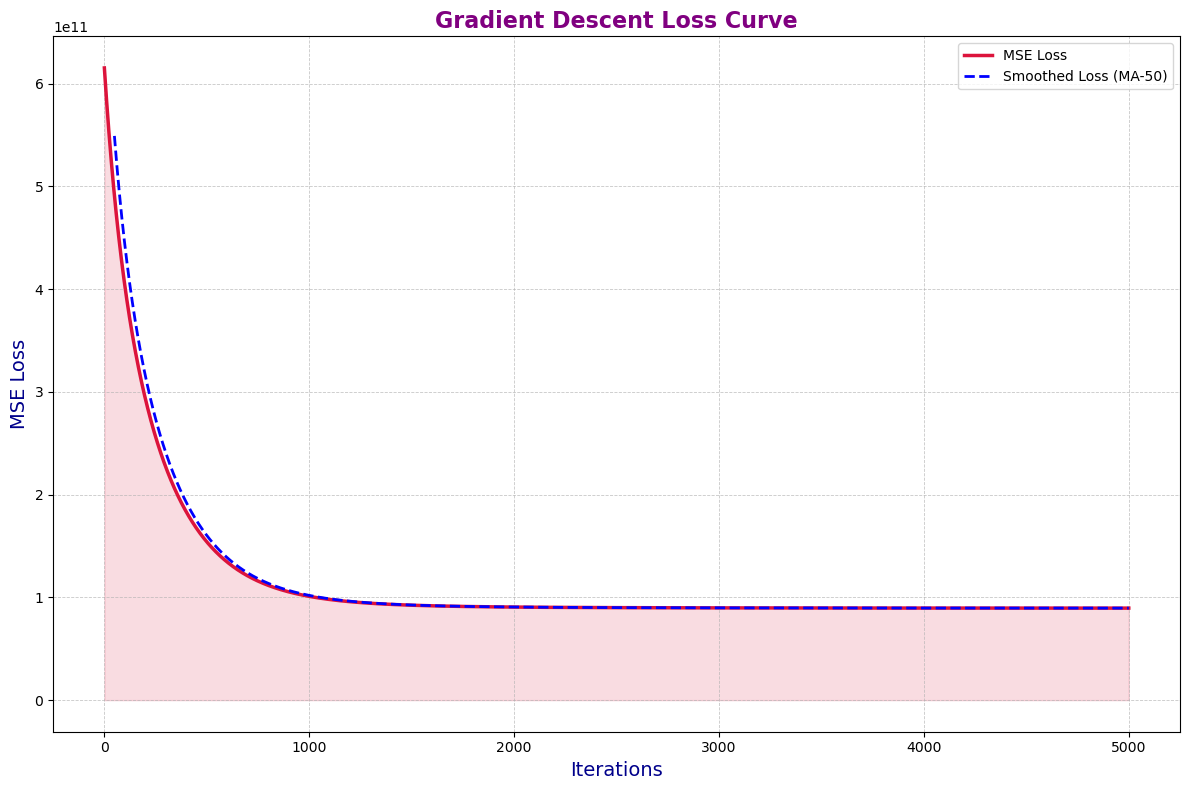

In [229]:
plt.figure(figsize=(12,8))

plt.plot(losses, color='crimson', linewidth=2.5, label="MSE Loss")

window = 50
if len(losses) > window:
    smooth = np.convolve(losses, np.ones(window)/window, mode='valid')
    plt.plot(range(window-1, len(losses)), smooth, color='blue', linewidth=2,
             linestyle='--', label="Smoothed Loss (MA-50)")


plt.fill_between(range(len(losses)), losses, color='crimson', alpha=0.15)

plt.title("Gradient Descent Loss Curve", color="purple", fontsize=16, fontweight='bold')
plt.xlabel("Iterations", color="darkblue", fontsize=14)
plt.ylabel("MSE Loss", color="darkblue", fontsize=14)

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

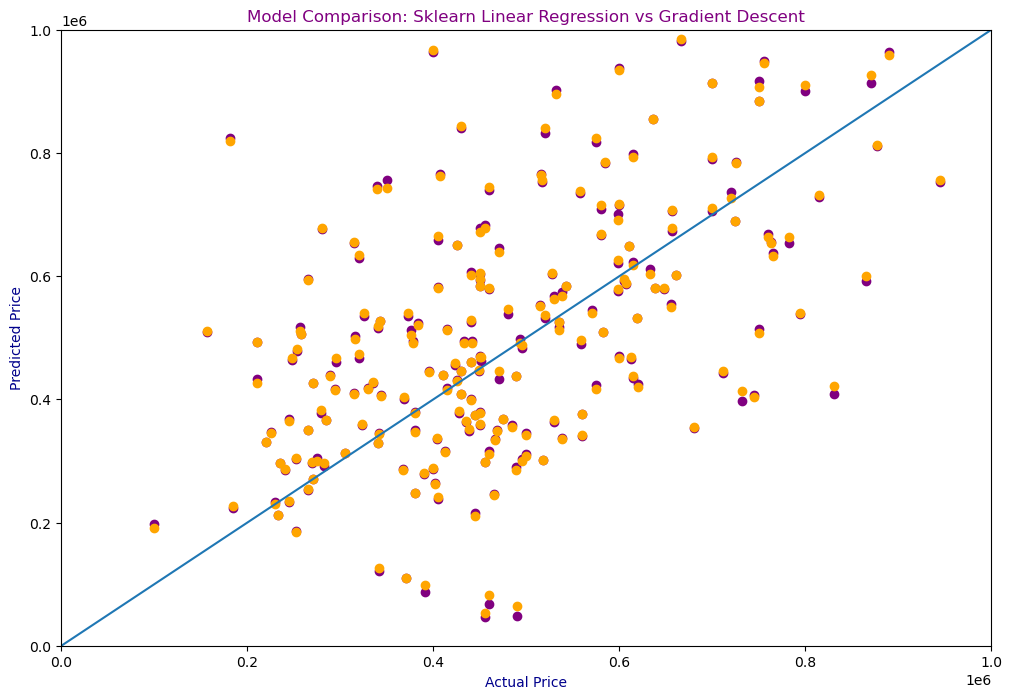

In [215]:
plt.figure(figsize=(12,8))

plt.scatter(y_test, y_pred_lr, color='purple')
plt.scatter(y_test, y_pred_gd, color='orange')
plt.plot([0, 1000000], [0, 1000000])
plt.xlim(0,1000000)
plt.ylim(0,1000000)

plt.xlabel("Actual Price", color='darkblue')
plt.ylabel("Predicted Price", color='darkblue')
plt.title("Model Comparison: Sklearn Linear Regression vs Gradient Descent", color='purple')

plt.show()


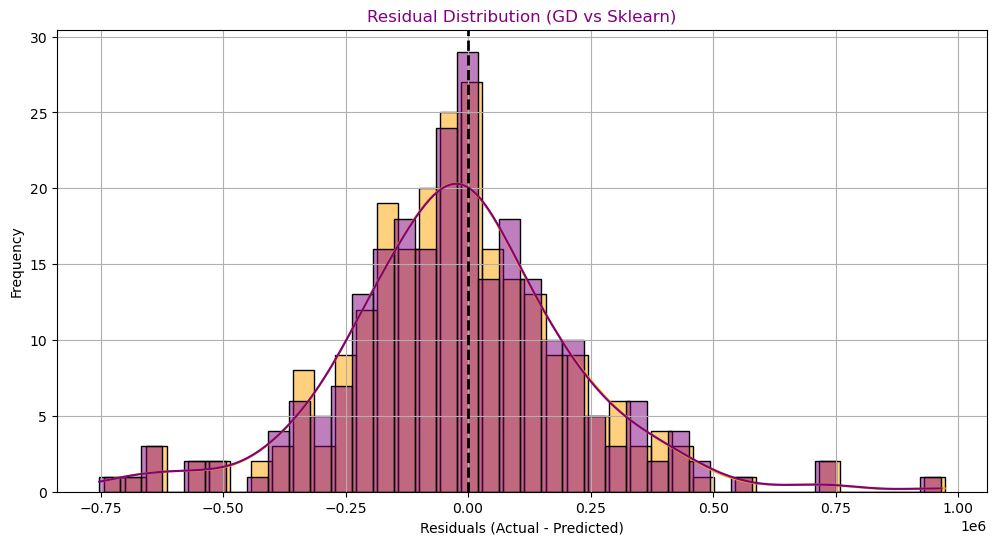

In [226]:
import seaborn as sns

residuals_gd = y_test - y_pred_gd
residuals_lr = y_test - y_pred_lr

res_limit = 1000000 
res_gd_clean = residuals_gd[(residuals_gd > -res_limit) & (residuals_gd < res_limit)]
res_lr_clean = residuals_lr[(residuals_lr > -res_limit) & (residuals_lr < res_limit)]

plt.figure(figsize=(12,6))

sns.histplot(res_gd_clean, kde=True, bins=40, color='orange')

sns.histplot(res_lr_clean, kde=True, bins=40, color='purple')

plt.axvline(0, color='black', linestyle='--', linewidth=2)

plt.title("Residual Distribution (GD vs Sklearn)", color='purple')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
